# Airline Passenger Satisfaction

В данном датасете представлены данные опроса удовлетворенности авиапассажиров. На основе анализа данных можно выяснить какие факторы влияют на уровень удовлетворенности авиаперевозками

## Обзор данных

* id - идентификатор пассажира
* Gender - пол пассажиров
* Customer Type - тип клиента
* Age - возраст пассажиров
* Type of Travel - цель полета пассажиров 
* Class - класс обслуживания 
* Flight distance - расстояние полета
* Inflight wifi service - уровень удовлетворенности услугой Wi-Fi на борту
* Departure/Arrival time convenient - уровень удовлетворенности временем отправления/прибытия
* Ease of Online booking - уровень удовлетворенности онлайн-бронированием
* Gate location - уровень удовлетворенности расположением выхода на посадку
* Food and drink - уровень удовлетворенности едой и напитками
* Online boarding - уровень удовлетворенности онлайн-регистрацией
* Seat comfort - удовлетворенность уровнем комфорта сиденья
* Inflight entertainment - уровень удовлетворенности развлечениями на борту
* On-board service - уровень удовлетворенности обслуживанием на борту
* Leg room service - уровень удовлетворенности обслуживанием сервиса для ног
* Baggage handling - уровень удовлетворенности доставки багажа
* Check-in service - уровень удовлетворенности услугой регистрации
* Inflight service - уровень удовлетворенности обслуживанием на борту
* Cleanliness - уровень удовлетворенности чистотой
* Departure Delay in Minutes - Задержка отправления в минутах
* Arrival Delay in Minutes - Задержка прибытия в минутах
* Satisfaction - уровень удовлетворенности авиакомпанией

**Знакомство с данными**

Первоначально выгрузим необходимые библиотеки для исследования данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 

Выгрузим датасет и сохраним его в переменной `pas_satisfaction`

In [2]:
pas_satisfaction = pd.read_csv('test.csv', sep = ',')

Посмотрим на названия колонок, первые 10 строк таблицы и общую информацию

In [3]:
pas_satisfaction.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
pas_satisfaction.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [5]:
pas_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
pas_satisfaction.shape

(25976, 25)

Итак, в таблице 25 столбцов и 25976 строк. 
Тип данных в колонках Gender, Customer Type, Type of Travel, Class, satisfaction - `строковый`, Arrival Delay in Minutes - `вещественный` (в связи с наличием в данной колонке пропусков), во всех остальных - `целочисленный`.

Во всех колонках пропуски отсутствуют, кроме колонки Arrival Delay in Minutes с данными по задержке прибытия в минутах.

Рассмотрим данные более детально, для начала выясним, по какой шкале пассажиры оценивали уровень удовлетворенности

In [7]:
pas_satisfaction['Baggage handling'].unique()

array([5, 4, 3, 1, 2])

Таким образом, мы видим, что уровень удовлетворенности оценивался пассажирами по 5-ти балльной шкале 

Посмотрим данные по пассажиру с индексом 1000

In [8]:
pas_satisfaction.iloc[1000]

Unnamed: 0                                              1000
id                                                     79213
Gender                                                  Male
Customer Type                                 Loyal Customer
Age                                                       22
Type of Travel                               Personal Travel
Class                                                    Eco
Flight Distance                                         1990
Inflight wifi service                                      2
Departure/Arrival time convenient                          4
Ease of Online booking                                     2
Gate location                                              4
Food and drink                                             1
Online boarding                                            2
Seat comfort                                               1
Inflight entertainment                                     1
On-board service        

Посмотрим, на какое расстояние летал пассажир с индексом 100

In [9]:
pas_satisfaction.iloc[100,7]

1061

**Исследуем пропуски**

Для начала посмотрим, в каких колонках есть пропуски и сколько их

In [10]:
pas_satisfaction.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Как мы заметили на этапе ознакомления с данными, пропуски имеются в колонке Arrival Delay in Minutes, расмотрим их более детально и решим, что с ними делать

In [11]:
pas_satisfaction['Arrival Delay in Minutes'].head(20)

0      44.0
1       0.0
2       0.0
3       6.0
4      20.0
5       0.0
6       0.0
7      65.0
8       0.0
9      14.0
10     19.0
11      7.0
12      0.0
13    113.0
14      0.0
15      2.0
16      0.0
17      0.0
18      0.0
19      0.0
Name: Arrival Delay in Minutes, dtype: float64

In [12]:
pas_satisfaction[pas_satisfaction['Arrival Delay in Minutes'].isna()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,516,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,656,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,1071,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,1224,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,1589,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,...,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,24072,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
24133,24133,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,24301,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
25128,25128,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


Пропуски можно заполнить или удалить

In [13]:
#удаление пропусков
pas_satisfaction_drop = pas_satisfaction.dropna()
pas_satisfaction_drop 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [14]:
#замена пропусков средним значением
pas_satisfaction_mean = pas_satisfaction.fillna(pas_satisfaction['Arrival Delay in Minutes'].mean())
pas_satisfaction_mean

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Посмотрим, как изменилось значение у пассажира с индексом 516, у которого до этого было значение Nan

In [15]:
pas_satisfaction_mean.iloc[516]

Unnamed: 0                                               516
id                                                    107365
Gender                                                Female
Customer Type                                 Loyal Customer
Age                                                       21
Type of Travel                               Personal Travel
Class                                                    Eco
Flight Distance                                          632
Inflight wifi service                                      1
Departure/Arrival time convenient                          5
Ease of Online booking                                     1
Gate location                                              4
Food and drink                                             2
Online boarding                                            1
Seat comfort                                               4
Inflight entertainment                                     2
On-board service        

Значение получилось достаточно большим, поэтому проверим размах значений в данном столбце

In [16]:
pas_satisfaction['Arrival Delay in Minutes'].max() - pas_satisfaction['Arrival Delay in Minutes'].min()

1115.0

Из-за сильного размаха значений заменять пропуски средним значением опасно, так как это может сильно исказить данные.
Попробуем посмотреть на моду и медиану

In [17]:
pas_satisfaction['Arrival Delay in Minutes'].mode()

0    0.0
dtype: float64

In [18]:
pas_satisfaction['Arrival Delay in Minutes'].median()

0.0

И мода, и медиана в данном случае равны 0, поэтому заменим пропуски на 0

In [19]:
pas_satisfaction['Arrival Delay in Minutes'] = pas_satisfaction['Arrival Delay in Minutes'].fillna(0)

Проверим на пропуски таблицу еще раз, чтобы убедиться, что теперь пропуски отсутствуют

In [20]:
pas_satisfaction.isna().sum() 

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Сортировка, фильтрация и группировка**

Отсортируем таблицу по убыванию расстояния полета и посмотрим на топ 10 самых длинных полетов

In [21]:
pas_satisfaction.sort_values(['Flight Distance'], ascending = False).head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
14615,14615,31815,Female,Loyal Customer,49,Business travel,Business,4983,4,1,...,2,5,2,3,4,4,4,0,14.0,neutral or dissatisfied
7851,7851,31874,Female,Loyal Customer,33,Business travel,Business,4983,1,1,...,4,1,4,5,4,3,4,0,0.0,satisfied
11779,11779,31816,Female,Loyal Customer,45,Personal Travel,Eco,4983,3,1,...,2,5,2,3,1,4,1,2,0.0,neutral or dissatisfied
14261,14261,31872,Male,Loyal Customer,46,Business travel,Business,4983,1,1,...,1,3,5,5,4,3,4,0,0.0,satisfied
3953,3953,59265,Male,Loyal Customer,44,Business travel,Business,4963,5,5,...,3,2,3,4,4,4,4,0,0.0,satisfied
3645,3645,59263,Male,Loyal Customer,44,Business travel,Business,4963,5,5,...,3,3,4,4,4,5,4,0,0.0,satisfied
16795,16795,56477,Male,Loyal Customer,57,Business travel,Business,4963,4,4,...,5,3,4,4,3,4,3,4,13.0,satisfied
25704,25704,59264,Male,Loyal Customer,49,Business travel,Business,4963,1,1,...,4,4,3,4,4,4,4,23,0.0,satisfied
23360,23360,56476,Male,Loyal Customer,60,Business travel,Business,4963,2,5,...,5,3,4,4,3,3,3,5,13.0,satisfied
14591,14591,56482,Male,Loyal Customer,41,Personal Travel,Eco,4963,2,4,...,4,5,4,3,3,2,3,0,4.0,neutral or dissatisfied


Посмотрим на распределние величин расстояния полета

<AxesSubplot:>

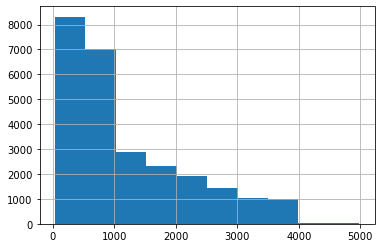

In [22]:
pas_satisfaction['Flight Distance'].hist()

По графику можно сделать вывод, что бОльшая часть пассажиров летает на небольшие расстояния до 1000

Посмотрим на графике уровень удовлетворенности поездкой в зависимости от расстояния перелета

Text(0.5, 1.0, 'Satisfaction by Flight Distance')

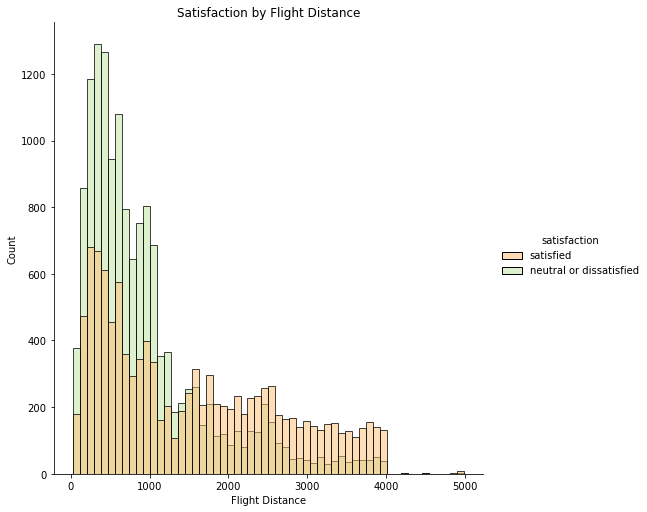

In [70]:
sns.displot(x = "Flight Distance", data = pas_satisfaction, hue ="satisfaction", height = 7,palette ="Spectral"  )
plt.title("Satisfaction by Flight Distance")

Вывод по графику: пассажиры, летающие на короткие расстояния остаются более недовольными, чем те, кто летает на расстояние 2000 и больше, что может быть связано с тем, что в долгих перелетах компании стараются предложить дополнительные услуги и повышенный уровень комфорта

Посмотрим сколько всего опрошенных остались довольны авиаперевозкой

In [23]:
pas_satisfaction.satisfaction.value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [53]:
#смотрим сколько человек остались довольными поездкой
satisfied = pas_satisfaction[pas_satisfaction['satisfaction'] == 'satisfied'].shape[0]

In [25]:
#считаем общее число пассажиров
total = pas_satisfaction['satisfaction'].shape[0]

In [26]:
sat_percent = satisfied/total
print(f'Процент удовлетворенных пассажиров равен {sat_percent: .0%}')

Процент удовлетворенных пассажиров равен  44%


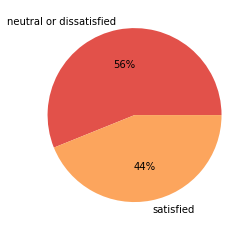

In [27]:
plt.pie(pas_satisfaction.satisfaction.value_counts(), labels = ['neutral or dissatisfied', 'satisfied'],
        colors = sns.color_palette("Spectral"), autopct = '%1.f%%')
pass

Таким образом, из всех опрошенных меньше половины (44%) остались довольными авиаперевозкой

Посмотрим, являются ли люди определенной возрастной категории более довольными поездкой

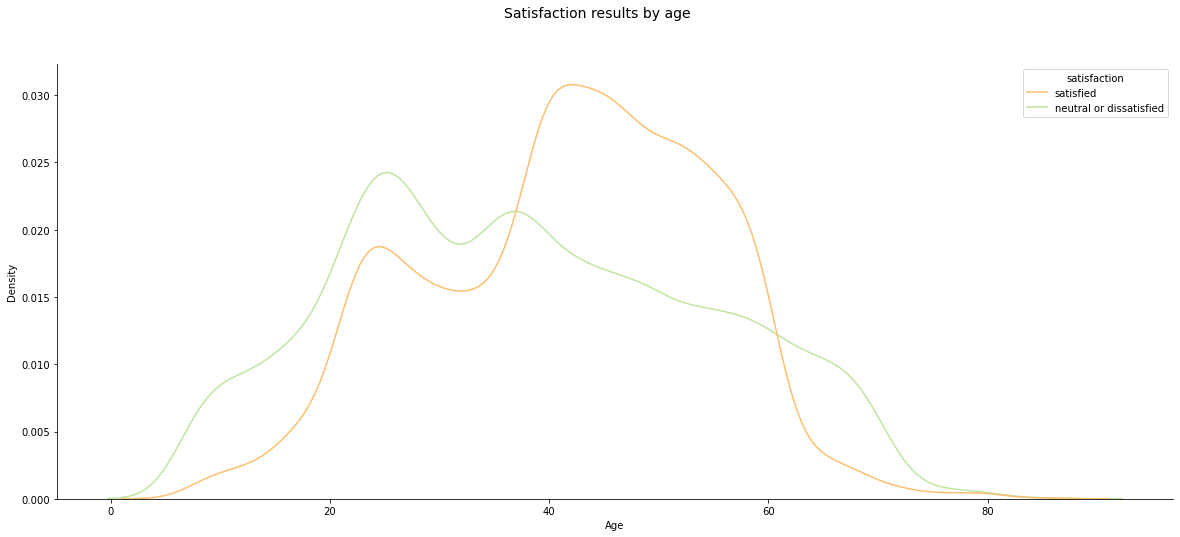

In [28]:
plt.figure(figsize = (20,8))
sns.kdeplot(data = pas_satisfaction, x= "Age", hue = "satisfaction", common_norm = False, palette ="Spectral")

plt.suptitle("Satisfaction results by age", fontsize = 14,)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

По графику можно сделать вывод, что категория молодых людей в возрасте примерно до 38 лет были менее довольными поездкой, в отличии от взрослых в возрасте 38-60, среди которых довольных поездкой было значительно больше

Посмотрим пассажиров какого класса было больше в опросе

In [29]:
pas_satisfaction['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

Пассажиров бизнес класса в опросе было почти столько же, сколько и пользующихся экономом, тех, кто выбирает эконом плюс оказалось меньше всего

Проверим гипотезу: лояльные клиенты больше остаются удовлетовренными в отличии от нелояльных

In [30]:
pas_satisfaction.groupby('Customer Type')['satisfaction'].value_counts()

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    10982
                   satisfied                  10195
disloyal Customer  neutral or dissatisfied     3591
                   satisfied                   1208
Name: satisfaction, dtype: int64

Гипотеза подтвердилась, однако, как мы можем видеть, среди опрошенных доля лояльных клиентов значительно превалирует в выборке, что может искажать подтверждение гипотезы относительно генеральной совокупности

Проверим еще одну гипотезу: *доля* пассажиров эконом класса, оставшихся довольными поездкой, ниже, чем в бизнес классе

Для начала посмотрим, какие классы представлены в таблице

In [31]:
pas_satisfaction['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [32]:
#сгруппируем данные по классу
pas_satisfaction.groupby('Class')['satisfaction'].value_counts()

Class     satisfaction           
Business  satisfied                  8686
          neutral or dissatisfied    3809
Eco       neutral or dissatisfied    9322
          satisfied                  2242
Eco Plus  neutral or dissatisfied    1442
          satisfied                   475
Name: satisfaction, dtype: int64

Считаем долю довольных пассажиров в бизнес классе и в экономе (без эконом плюс)

In [33]:
sat_business = pas_satisfaction[(pas_satisfaction['Class'] == 'Business')&
                                (pas_satisfaction['satisfaction'] == 'satisfied')].shape[0]
business_total = pas_satisfaction[(pas_satisfaction['Class'] == 'Business')].shape[0]
business_percent = sat_business/business_total 

In [34]:
sat_eco = pas_satisfaction[(pas_satisfaction['Class'] == 'Eco')&
                           (pas_satisfaction['satisfaction'] == 'satisfied')].shape[0]
eco_total = pas_satisfaction[(pas_satisfaction['Class'] == 'Eco')].shape[0]
eco_percent = sat_eco/eco_total 

In [35]:
print(f'Процент удовлетворенных в классе бизнес {business_percent: .0%}')
print(f'Процент удовлетворенных пассажиров равен {eco_percent: .0%}')

Процент удовлетворенных в классе бизнес  70%
Процент удовлетворенных пассажиров равен  19%


Визуализируем данные

<AxesSubplot:xlabel='Class'>

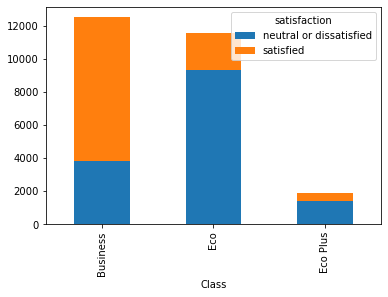

In [36]:
pas_satisfaction.groupby('Class')['satisfaction'].value_counts().unstack().plot(kind='bar', stacked=True)

Выдвинутая гипотеза подтвердилась, в бизнес классе доля удовлетворенных пассажиров в три раза превышает тех, кто остался довольным поездкой в эконом классе, а вот в экономе и эконом плюсе больше нейтральных или недовольных пассажиров

**Создание новых переменных**

Создадим бинарную переменную: если расстояние полета превышает 2000 значение принимается за единицу, если выходит за эти значения, тогда принимается за 0

In [37]:
pas_satisfaction['long_flight'] = pas_satisfaction['Flight Distance'].apply(lambda x: 1 if x > 2000 else 0)

In [38]:
pas_satisfaction['long_flight']

0        0
1        1
2        0
3        1
4        0
        ..
25971    0
25972    0
25973    0
25974    0
25975    0
Name: long_flight, Length: 25976, dtype: int64

Создадим категориальную переменную на основе количественной Departure Delay in Minutes: если задержка составила 0-5 минут - вылетел вовремя, 6-30 минут - небольшая задержка рейса, 31-60 - существенная задержка рейса, 60+ - рейс сильно задержался

In [39]:
def departure_delay(time):
    if 0 <= time <= 5:
        return 'in time'
    elif 6 <= time <= 30:
        return 'slight delay'
    elif 31 <= time <= 60:
        return 'significant delay'
    elif time > 60:
        return 'heavily delay'
    else:
        return time

pas_satisfaction['delay_category'] = pas_satisfaction['Departure Delay in Minutes'].apply(departure_delay) 

In [40]:
#проверяем сколько полетов попало в каждую из выделенных категорий
pas_satisfaction['delay_category'].value_counts()

in time              17428
slight delay          4979
significant delay     1833
heavily delay         1736
Name: delay_category, dtype: int64

<AxesSubplot:>

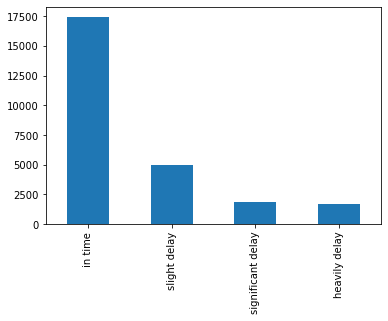

In [41]:
pas_satisfaction['delay_category'].value_counts().plot(kind='bar')

Итак, создав новую переменную, мы видим, что вовремя вылетела большая часть рейсов. Посмотрим на формат новой переменной и сделаем из нее категориальную

In [42]:
pas_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [43]:
pas_satisfaction['delay_category'] = pd.Categorical(pas_satisfaction['delay_category'])

In [44]:
pas_satisfaction['delay_category'].dtype

CategoricalDtype(categories=['heavily delay', 'in time', 'significant delay',
                  'slight delay'],
, ordered=False)

Используем наши новые сгруппированные значения и проверим гипотезу: пассажиры, вылетающие вовремя более довольны поездкой, чем те, у кого рейс задержался

In [45]:
pas_satisfaction[(pas_satisfaction['delay_category']=='in time')
                 &(pas_satisfaction['satisfaction']=='satisfied')].shape[0]

8064

In [46]:
pas_satisfaction[(pas_satisfaction['delay_category']!='in time')
                 &(pas_satisfaction['satisfaction']=='satisfied')].shape[0]

3339

Действительно, вылетающие вовремя пассажиры более довольны поездкой

Создадим еще одну переменную на основе нескольких колонок. Представим, что поездку можно считать идеальной, если самолет вылетел по расписанию, вам понравились еда и напитки, было комфортное сидение, прекрасный сервис на борту и чистота

In [47]:
pas_satisfaction['happy_flight'] = np.where((pas_satisfaction['delay_category'] == 'in time') &
         (pas_satisfaction['Food and drink'] == 5) &
         (pas_satisfaction['Seat comfort'] == 5) &
         (pas_satisfaction['On-board service'] == 5) &
         (pas_satisfaction['Cleanliness'] == 5 ), 1, 0)

In [48]:
pas_satisfaction['happy_flight'].sum()

444

Получилось, что идеальная поездка была у 444 опрошенных

Сгруппируем данные по степени удовлетворенности и посмотрим на средние значения, которые ставили пассажиры

In [49]:
pas_satisfaction.pivot_table(index='satisfaction', 
                  values=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 
                         'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                         'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
                         'Checkin service', 'Inflight service', 'Cleanliness'],
                  aggfunc=['mean'])

mean                              \
                        Baggage handling Checkin service Cleanliness   
satisfaction                                                           
neutral or dissatisfied         3.370548        3.043025    2.919371   
satisfied                       3.968956        3.660703    3.755064   

                                                           \
                        Departure/Arrival time convenient   
satisfaction                                                
neutral or dissatisfied                          3.134701   
satisfied                                        2.934491   

                                                                             \
                        Ease of Online booking Food and drink Gate location   
satisfaction                                                                  
neutral or dissatisfied               2.559665       2.959926      2.995951   
satisfied                             3.008682       3.541787      2.952995   

                                                                 \
                        Inflight entertainment Inflight service   
satisfaction                                                      
neutral or dissatisfied               2.885473         3.392781   
satisfied                             3.961326         3.977024   

                                                                \
                        Inflight wifi service Leg room service   
satisfaction                                                     
neutral or dissatisfied              2.393536         2.988952   
satisfied                            3.148031         3.811804   

                                                                       
                        On-board service Online boarding Seat comfort  
satisfaction                                                           
neutral or dissatisfied         3.021066        2.668702     3.044878  
satisfied                       3.851618        4.019469     3.965974

По пивотальной таблице мы видим,  что удовлетворенные пассажиры в среднем ставили лишь чуть более высокие оценки, а по некторым показаетлям и ниже, чем нейтральные или неудовлетворенные пассажиры. Следует отметить, что оценка онлайн регистрации в среднем значительно выше у удовлетворенных пассажиров

**Корреляция, z-оценка, выбросы**

Посмотрим, есть ли зависимости между исследуемыми переменными

In [50]:
corr = pas_satisfaction.corr()

In [51]:
corr.abs().unstack().sort_values(ascending=False).drop_duplicates()

Unnamed: 0                  Unnamed: 0                           1.000000
Arrival Delay in Minutes    Departure Delay in Minutes           0.955770
Flight Distance             long_flight                          0.859602
Inflight wifi service       Ease of Online booking               0.710684
Inflight entertainment      Cleanliness                          0.695269
                                                                   ...   
Gate location               Inflight entertainment               0.000340
Online boarding             Unnamed: 0                           0.000254
Departure Delay in Minutes  Departure/Arrival time convenient    0.000238
Arrival Delay in Minutes    Flight Distance                      0.000117
Checkin service             Ease of Online booking               0.000108
Length: 232, dtype: float64

<AxesSubplot:>

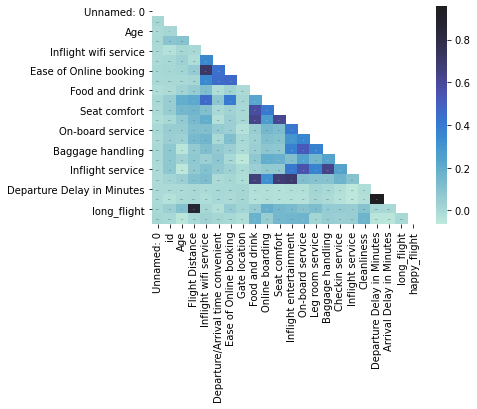

In [55]:
mask = np.triu(corr)
sns.heatmap(corr, center = 1, annot = True, mask = mask, annot_kws = {'size':1})

По графику уже видны зависимости между некоторыми переменными, однако данные плохо читаются, поэтому построим еще одну тепловую карту

<AxesSubplot:>

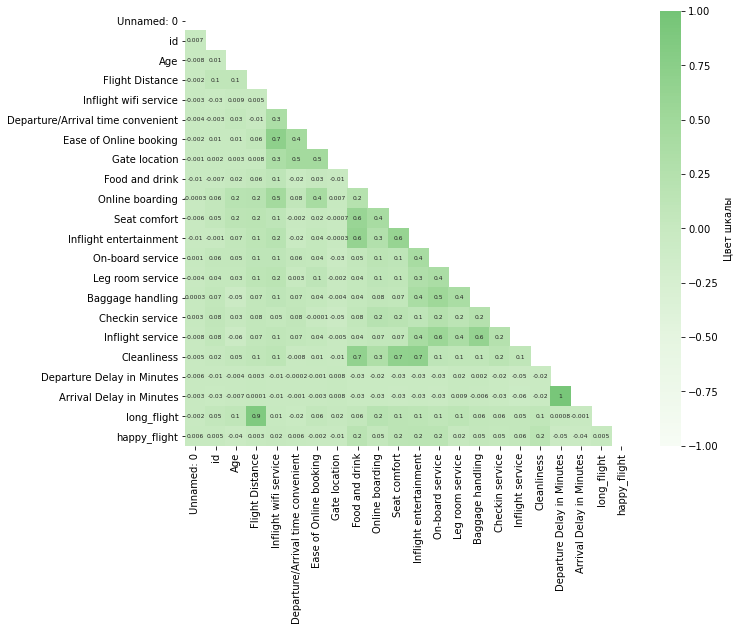

In [56]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True,
            center = 1,
            annot_kws = {'size':6},
            cmap = 'Greens',
            vmax = 1,
            vmin = -1,
            mask = mask,
            fmt = '.1g',
            cbar_kws = {'label': 'Цвет шкалы'})

* Итак, мы видим зависимость между задержкой времени отправления и времени прибытия (коэффициент = 0,95), что выглядит вполне логичным: если самолет задержался при вылете, он скорее всего задержится и по прибытии.
* Высокая зависимость наблюдается между оценками чистоты и оценками за еду и напитки, комфорт и развлечения на борту
* Также высокая зависимость между оценкамой легкости онлайн бронирования и вай-фаем на борту

Посмотрим, как выглядит зависимость на графике между задержкой отправления и прилета

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

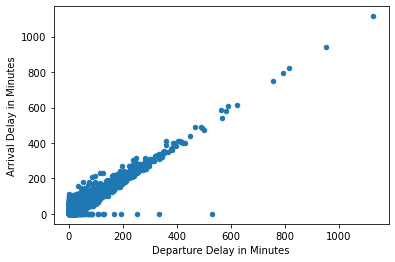

In [57]:
pas_satisfaction.plot('Departure Delay in Minutes', 'Arrival Delay in Minutes', kind= 'scatter')

Как мы видим, зависимость между переменными ярко выражена на графике, при этом характер зависимости - линейный

Далее допустим нам надо посмотреть, на сколько у нашего пассажира с индексом 777 отклоняется время задержки от среднего значения

In [58]:
pas_satisfaction['z-score'] = scipy.stats.zscore(pas_satisfaction['Departure Delay in Minutes'])

In [59]:
pas_satisfaction['z-score'][777]

0.5797032459462116

Таким образом, мы видим, что наш пассажир задержался больше, чем в среднем

Посмотрим, какие оценки ставили задержавшиеся пассажиры

In [60]:
pas_satisfaction.groupby('Departure/Arrival time convenient')['z-score'].mean()

Departure/Arrival time convenient
0   -0.070698
1    0.016875
2    0.017011
3    0.006217
4   -0.006762
5   -0.004798
Name: z-score, dtype: float64

Можно сделать вывод, что пассажиры, которые задержались больше среднего, ставили 1-3 балла за время отправления/прибытия, что выглядит вполне логичным раз их рейс задержали

Попробуем найти аномальные значения задержки вылета

In [61]:
pas_satisfaction['Departure Delay in Minutes'].describe()

count    25976.00000
mean        14.30609
std         37.42316
min          0.00000
25%          0.00000
50%          0.00000
75%         12.00000
max       1128.00000
Name: Departure Delay in Minutes, dtype: float64

In [62]:
q3 = np.percentile(pas_satisfaction['Departure Delay in Minutes'], 75)
q1 = np.percentile(pas_satisfaction['Departure Delay in Minutes'], 25)

Найдем интерквартильный размах

In [63]:
iqr = q3 - q1
print(iqr)

12.0


Ищем границу сверху и снизу, чтобы понять, что мы будем брать за выбросы

In [64]:
iqr_bottom = q1 - 1.5 * iqr
iqr_top = q3 + 1.5 * iqr
print(iqr_bottom, iqr_top)

-18.0 30.0


итак, первое число отрицательное, получается слева выбросов нет

In [65]:
pas_satisfaction[pas_satisfaction['Departure Delay in Minutes'] > iqr_top].shape

(3569, 29)

Получается в нашей выборке содердится 3569 аномальных значений задержки вылета рейса

Посмотрим, где аномальных значений встречается больше: в полетах на большое расстояние или на короткое

In [66]:
pas_satisfaction[pas_satisfaction['Departure Delay in Minutes'] > iqr_top]['long_flight'].value_counts()

0    2849
1     720
Name: long_flight, dtype: int64

Как можно видеть, в полетах на короткие расстояние аномальных значений задержки вылета больше

## Выводы

Проанализировав данные опроса пассажиров об удовлетворенности авиаперевозкой, можно сделать следующие выводы:
1. Большая часть пассажиров летает на небольшие расстояния, при этом удовлетворенность короткими аваперелетами среди пассажиров значительно ниже, из чего можно предположить, что в перелетах на длинные дистанции компании предоставляют лучший сервис и дополнительные услуги, которые влияют на удовлетворенность пассажиров
2. Из всех опрошенных меньше половины(44%) остались довольными авиаперевозками, однако анализ осложняет выделение нейтральных и неудовлетворенных пассажиров в одну категорию, в связи с чем трудно разграничить эти две категории
3. Более старшие по возрасту пассажиры (40-60 лет) остаются удовлетворенными поездками чаще, чем молодые, в связи с чем следует обратить внимание на то, как повысить удовлетворенность молодых людей авиаперевозками
4. Лояльные клиенты чаще остаются довольными перелетом, поэтому стоит сделать упор на повышение лояльности авиапассажиров
5. В бизнес классе большинство (70%) остаются довольными поездкой, в то время как в эконом классе удовлетворенных пассажиров лишь 19%, поэтому следует повышать качество предоставляемых услуг в классе эконом
6. Время вылета также оказывает влияние на удовлетворенность поездкой: пассажиры, вылетающие вовремя скорее отанутся удовлетворенными
7. Между исселдуемыми переменными было выявлено не так много зависимых между собой, наиболее сильная связь между временем задержкой рейса и задержкой прибытия, что яляется логичным: позже вылетел, позже прилетел
8. Задержка рейса влияет на удовлетвореность, что показала и z-оценка: пассажиры, задержавшиеся больше среднего значения ставят баллы от 1-3 по критерию удовлетворенности врменем отправления/прибытия